<a href="https://colab.research.google.com/github/Kevin-Yau/CHL5230/blob/main/Datathon_1_Team5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research
Build a model to test the lung cancer serverity of a person


(1465, 12)
Index(['Age', 'Gender', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk',
       'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Severity'],
      dtype='object')
               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker  

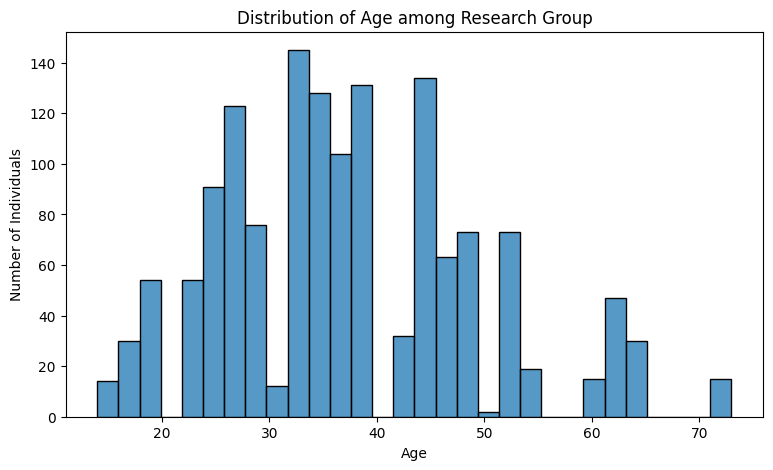

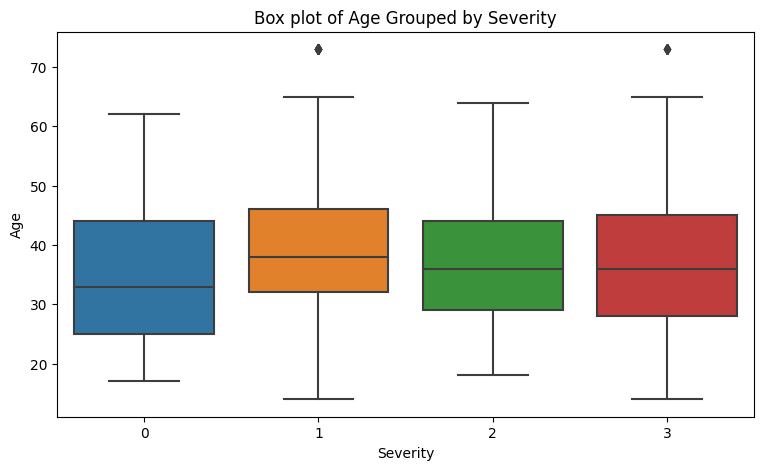

+----+------------+-----------------+
|    |   Severity |   Air Pollution |
|----+------------+-----------------|
|  0 |          0 |         2.60066 |
|  1 |          1 |         2.93373 |
|  2 |          2 |         5.69315 |
|  3 |          3 |         4.2129  |
+----+------------+-----------------+
+----+------------+-----------------+
|    |   Severity |   Alcohol Usage |
|----+------------+-----------------|
|  0 |          0 |         2.23102 |
|  1 |          1 |         4.1988  |
|  2 |          2 |         6.83014 |
|  3 |          3 |         3.60215 |
+----+------------+-----------------+
+----+------------+----------------+
|    |   Severity |   Genetic Risk |
|----+------------+----------------|
|  0 |          0 |        2.73267 |
|  1 |          1 |        4.29217 |
|  2 |          2 |        6.37534 |
|  3 |          3 |        2.4129  |
+----+------------+----------------+
+----+------------+-----------+
|    |   Severity |   Obesity |
|----+------------+-----------|


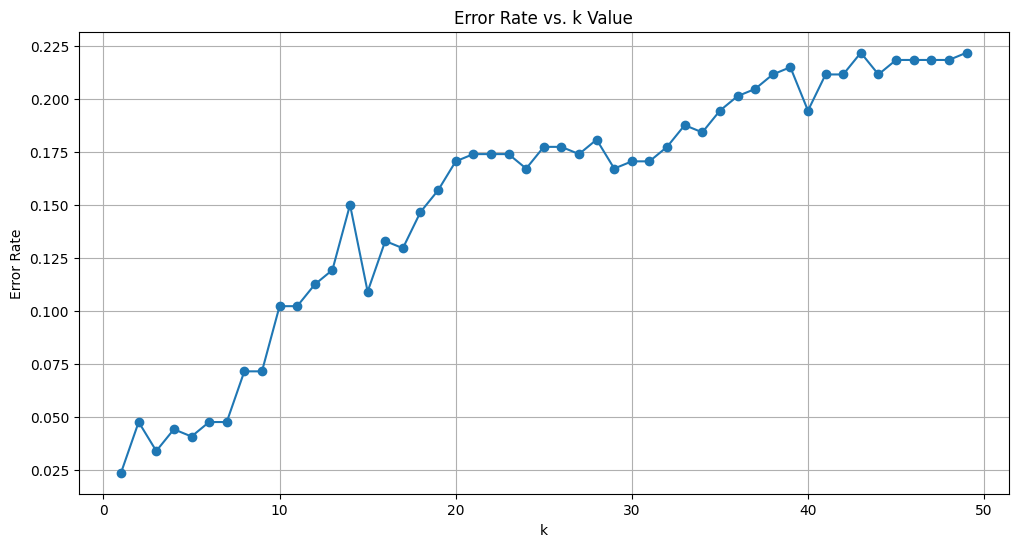

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        57
           1       0.91      1.00      0.95        58
           2       1.00      1.00      1.00        80
           3       0.99      0.91      0.95        98

    accuracy                           0.97       293
   macro avg       0.96      0.97      0.97       293
weighted avg       0.97      0.97      0.97       293



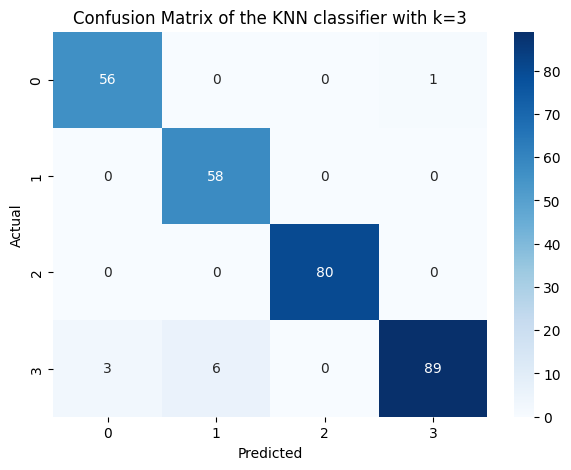

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Read the dataset into a Pandas DataFrame
canc_df = pd.read_csv('/content/CHL5230-F23-Datathon#1-Dataset2.csv')

# Display the first few rows of the dataset
canc_df.head()

# Getting the shape of the dataframe
print(canc_df.shape)

# List the columns of the dataframe
print(canc_df.columns)

# Display summary statistics
print(canc_df.describe())

# Check for missing values in each column
print(canc_df.isnull().sum())

# Exploratory Data Analysis: Visualize columns of variables we are interested in

## Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(canc_df['Age'], bins=30)
plt.title('Distribution of Age among Research Group')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.show()

## Create a box plot for the 'Age' feature grouped by 'Severity'
plt.figure(figsize=(9, 5))
sns.boxplot(data=canc_df, x='Severity', y='Age')
plt.title('Box plot of Age Grouped by Severity')
plt.xlabel('Severity')
plt.ylabel('Age')
plt.show()

## Using groupby to calculate the average air pollution by severity
avg_polt = canc_df.groupby('Severity')['Air Pollution'].mean().reset_index()
## Create a table to see the 'Air Pollution' feature grouped by 'Severity'
print(tabulate(avg_polt, headers='keys', tablefmt='psql'))

## Using groupby to calculate the average alcohol usage by severity
avg_usage = canc_df.groupby('Severity')['Alcohol Usage'].mean().reset_index()
## Create a table to see the 'Alcohol Usage' feature grouped by 'Severity'
print(tabulate(avg_usage, headers='keys', tablefmt='psql'))

## Using groupby to calculate the genetic risk by severity
avg_risk = canc_df.groupby('Severity')['Genetic Risk'].mean().reset_index()
## Create a table to see the 'Genetic Risk' feature grouped by 'Severity'
print(tabulate(avg_risk, headers='keys', tablefmt='psql'))

## Using groupby to calculate the obesity by severity
avg_obes = canc_df.groupby('Severity')['Obesity'].mean().reset_index()
## Create a table to see the 'Obesity' feature grouped by 'Severity'
print(tabulate(avg_obes, headers='keys', tablefmt='psql'))

## Using groupby to calculate the smoking by severity
avg_smok = canc_df.groupby('Severity')['Smoking'].mean().reset_index()
## Create a table to see the 'Smoking' feature grouped by 'Severity'
print(tabulate(avg_smok, headers='keys', tablefmt='psql'))

## Using groupby to calculate the chest pain by severity
avg_pain = canc_df.groupby('Severity')['Chest Pain'].mean().reset_index()
## Create a table to see the 'Chest Pain' feature grouped by 'Severity'
print(tabulate(avg_pain, headers='keys', tablefmt='psql'))


# Split data into features we chose and label
X = canc_df[['Age', 'Alcohol Usage', 'Air Pollution', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood']]
y = canc_df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Elbow Method to choose an optimal k value
## Choose a range of k values
k_val = range(1, 50)

## A list of the error rates for each k value
errors = []

## Do iterations for k values to train and test the KNN classifier
for k in k_val:
    ## Initialize a KNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    ## Train the classifier on the training dataset
    knn.fit(X_train, y_train)

    ## Predict the labels for the test dataset
    y_pred = knn.predict(X_test)

    ## Calculate the error rate by '1 - accuracy'
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

## Visualization of the relationship between k value and the error rate
plt.figure(figsize=(12, 6))
plt.plot(k_val, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Apply KNN Method with the k value 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

## Predict using the test data
y_pred = knn.predict(X_test)

## Evaluate the model
print(classification_report(y_test, y_pred))


## Getting unique classes and plotting the confusion matrix
classes = canc_df['Severity'].unique()
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Blues', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the KNN classifier with k=3')
plt.show()

BMI dataset
Build a model to predict BMI (category) based on demographical features

(23535, 10)
Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')
                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.0

<ipython-input-4-7fe4780f5c89>:29: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



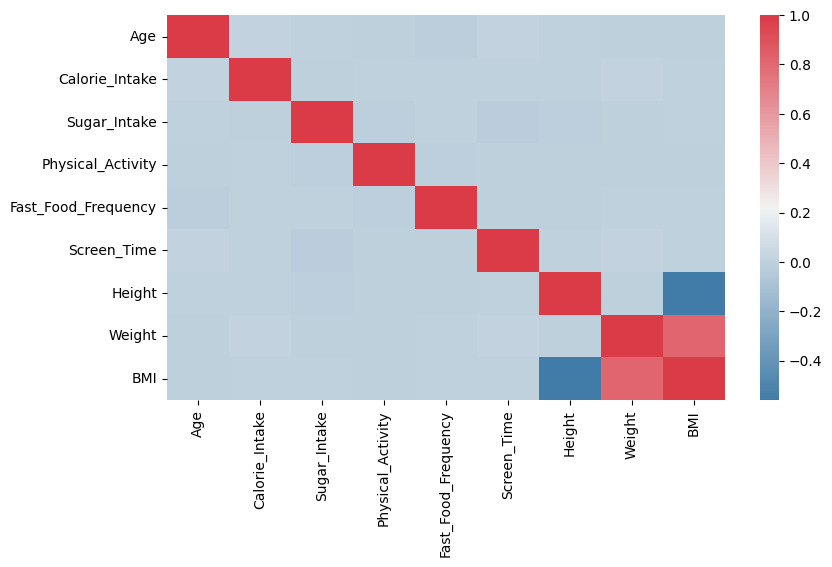

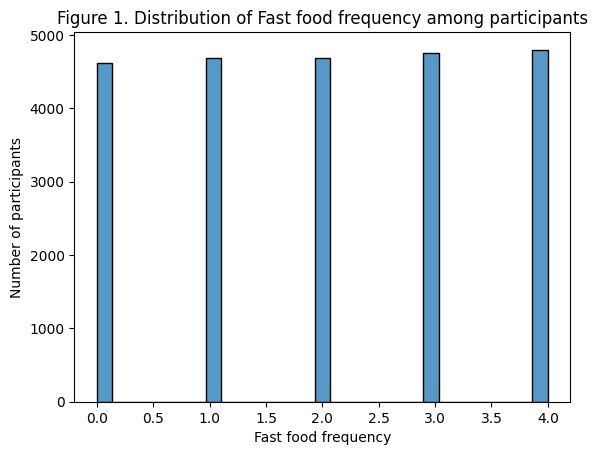

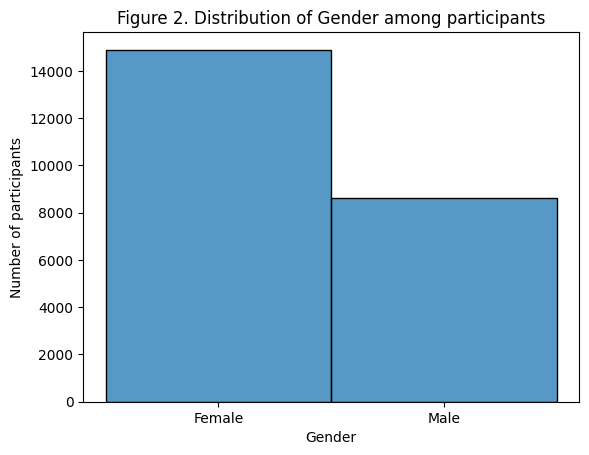

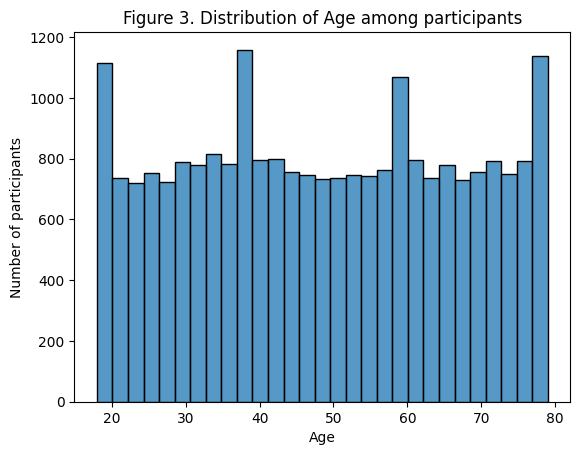

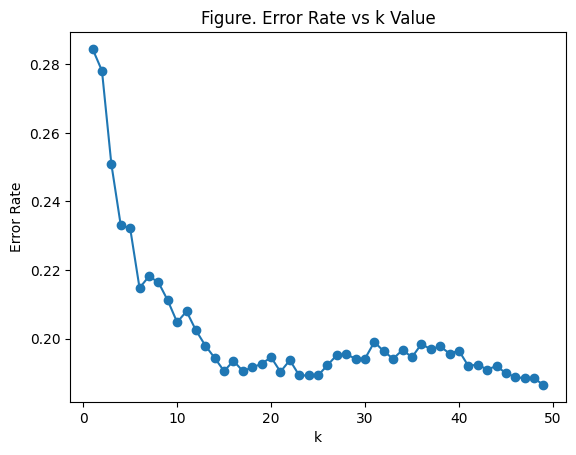

               precision    recall  f1-score   support

normal weight       0.78      0.90      0.83      1635
      obesity       0.92      0.83      0.87      1265
   overweight       0.73      0.78      0.75      1269
  underweight       0.98      0.56      0.71       538

     accuracy                           0.81      4707
    macro avg       0.85      0.77      0.79      4707
 weighted avg       0.82      0.81      0.81      4707



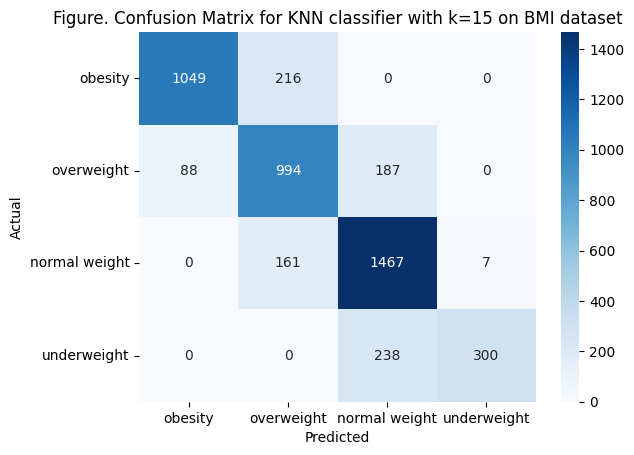

0.8094327597195666

In [ ]:
# BMI dataset

import pandas as pd
import numpy as np

# read dataset
BMIdf = pd.read_csv('CHL5230-F23-Datathon #1-Dataset1.csv')
BMIdf.head()

# check dimension of the dataset
print(BMIdf.shape)

# list the columns of the dataframe
print(BMIdf.columns)

# summary statistics
print(BMIdf.describe())

# check missing value
print(BMIdf.isnull().sum())

# visualize the data with histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,5))

# correlation matrix between variables
BMI_Mcorr = BMIdf.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(BMI_Mcorr, annot=False, cmap=cmap)
plt.show()

# Fast food frequency
sns.histplot(BMIdf['Fast_Food_Frequency'])
plt.title('Figure 1. Distribution of Fast food frequency among participants')
plt.xlabel('Fast food frequency')
plt.ylabel('Number of participants')
plt.show()

# Gender
sns.histplot(BMIdf['Gender'])
plt.title('Figure 2. Distribution of Gender among participants')
plt.xlabel('Gender')
plt.ylabel('Number of participants')
plt.show()

# Age
sns.histplot(BMIdf['Age'])
plt.title('Figure 3. Distribution of Age among participants')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.show()

# interactive box plot of BMI by Gender
import plotly.express as px

fig_bmiGen = px.box(BMIdf, x='Gender', y='Age', title='Box Plot of Age distribution by Gender', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])
fig_bmiGen.update_layout(template="plotly_white")
fig_bmiGen.show()

# encode the 'gender' feature using 0: male, 1:female
BMIdf['Gender'] = BMIdf['Gender'].map({'Male': 0, 'Female': 1})
BMIdf.head()

# create a function that change BMI variable into categories
def fun_BMI_cat (row):
    if row['BMI'] < 18.5:
        return 'underweight'
    if row['BMI'] >=18.5 and row['BMI'] < 25:
        return 'normal weight'
    if row['BMI'] >=25 and row['BMI'] < 30:
        return 'overweight'
    if row['BMI'] >=30:
        return 'obesity'

# apply the above function to each row of BMI dataframe to create a column contain BMI category
BMIdf['BMI_cat'] = BMIdf.apply(lambda row: fun_BMI_cat(row), axis=1)


# KNN
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# features
X = BMIdf[['Age','Gender','Calorie_Intake','Sugar_Intake','Physical_Activity','Fast_Food_Frequency',
           'Screen_Time','Height','Weight']]
# label
y = BMIdf['BMI_cat']

# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# choose the optimal k value using elbow method
k_values = range(1, 50)
# check error rates for each k value
errors = []
# train and test KNN classifier with 10 different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # train classifier on training dataset
    knn.fit(X_train, y_train)

    # test model classifications on test set
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

# plot error rate vs k value
plt.plot(k_values, errors, marker='o')
plt.title('Figure. Error Rate vs k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

# apply KNN with optimal k value 15
knn_optimal = KNeighborsClassifier(n_neighbors=15)
knn_optimal.fit(X_train, y_train)

# predict y value
y_pred_optimal = knn_optimal.predict(X_test)

# evaluate model with confusion matrix
print(classification_report(y_test, y_pred_optimal))

classes = BMIdf['BMI_cat'].unique()
sns.heatmap(confusion_matrix(y_test, y_pred_optimal, labels=classes), cmap='Blues', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Figure. Confusion Matrix for KNN classifier with k=15 on BMI dataset')
plt.show()

# overall correct classification rate
BMI_confusion = confusion_matrix(y_test, y_pred_optimal, labels=classes)
np.trace(BMI_confusion)/np.sum(BMI_confusion)


